In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ad = pd.read_csv("/content/Attribute DataSet.csv")
ds = pd.read_csv("/content/Dress Sales.csv")

#Basic overview

In [ ]:
ad.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [ ]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        500 non-null    int64  
 1   Style           500 non-null    object 
 2   Price           498 non-null    object 
 3   Rating          500 non-null    float64
 4   Size            500 non-null    object 
 5   Season          498 non-null    object 
 6   NeckLine        497 non-null    object 
 7   SleeveLength    498 non-null    object 
 8   waiseline       413 non-null    object 
 9   Material        372 non-null    object 
 10  FabricType      234 non-null    object 
 11  Decoration      264 non-null    object 
 12  Pattern Type    391 non-null    object 
 13  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 54.8+ KB


In [ ]:
ad.describe()

,Dress_ID,Rating,Recommendation
count,5.000000e+02,500.000000,500.000000
mean,9.055417e+08,3.528600,0.420000
std,1.736190e+08,2.005364,0.494053
min,4.442820e+08,0.000000,0.000000
25%,7.673164e+08,3.700000,0.000000
50%,9.083296e+08,4.600000,0.000000
75%,1.039534e+09,4.800000,1.000000
max,1.253973e+09,5.000000,1.000000


In [ ]:
ad.shape

(500, 14)

In [ ]:
#checking for duplicates for test data
print('Duplicates:')
ad.duplicated(subset=None, keep='first').unique()


Duplicates:


array([False])

In [ ]:
#checking for null values for train data
print('Count of null values:')
ad.isnull().sum().sum()

Count of null values:


835

In [ ]:
ad.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

##Observation
1. Only rating is continuous and rest independent features are categorical
2. No duplicates found
3. Total 835 Null values found

#Univariate analysis

##For Rating

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


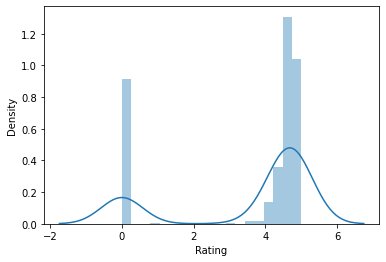

In [ ]:
sns.distplot(ad['Rating'])

###Applying various transformations to make it Guassian

###Square root transform

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Transformed feature
Original feature


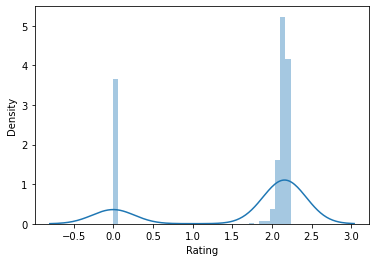

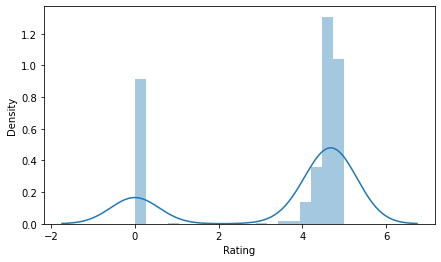

In [ ]:
sqrt_target = ad['Rating']**(1/2)
sns.distplot(sqrt_target)
print("Transformed feature")
fig= plt.subplots(figsize=(7,4))
sns.distplot(ad['Rating'])
print("Original feature")
#in features 

###Log transform

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Transformed feature
Original feature


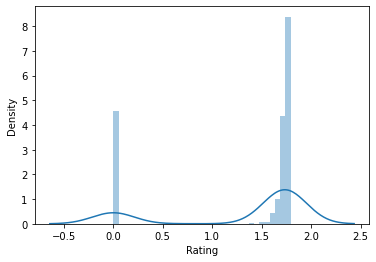

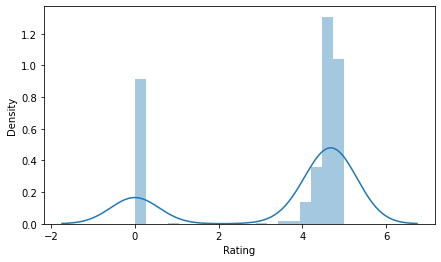

In [ ]:
log_target = np.log1p(ad['Rating'])
sns.distplot(log_target)
print("Transformed feature")
fig= plt.subplots(figsize=(7,4))
sns.distplot(ad['Rating'])
print("Original feature")

###yeojohnson transform

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Transformed feature
Original feature


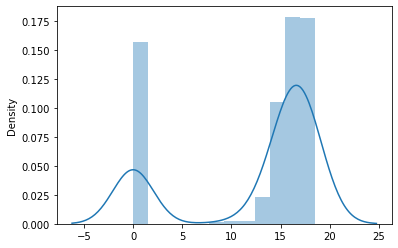

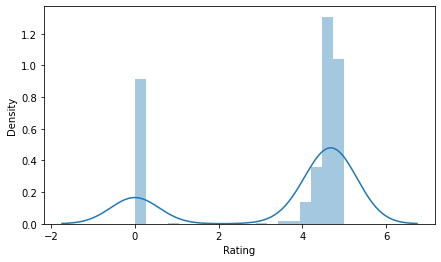

In [ ]:
from scipy.stats import yeojohnson
yf_target, lam = yeojohnson(ad['Rating'])
sns.distplot(yf_target)
print("Transformed feature")
fig= plt.subplots(figsize=(7,4))
sns.distplot(ad['Rating'])
print("Original feature")
#in feature

####Observation
No transformation is helping to convert the distribution to gaussian

###Univariate for categorical variables

In [ ]:
"""storing all the categorical varibales into a list"""
train_cat = list(ad.select_dtypes(include=['object']).columns)

In [ ]:
"""Creating a dataframe to plot number of unique values in each category"""
count_cat = []
for i in train_cat:
  if float('nan') in ad[i].unique():
    count_cat.append(len(ad[i].unique()) - 1)
    print("asdf")
  else:
    count_cat.append(len(ad[i].unique()))
#creating a dataframe so that we could visualise the number of unique values in categorical variable
df = pd.DataFrame()
df['category_name'] = train_cat
df['count_values'] = count_cat
print(df.head(15))

   category_name  count_values
0          Style            13
1          Price             8
2           Size             7
3         Season             9
4       NeckLine            17
5   SleeveLength            18
6      waiseline             5
7       Material            24
8     FabricType            23
9     Decoration            25
10  Pattern Type            15


Text(0, 0.5, 'category_name')

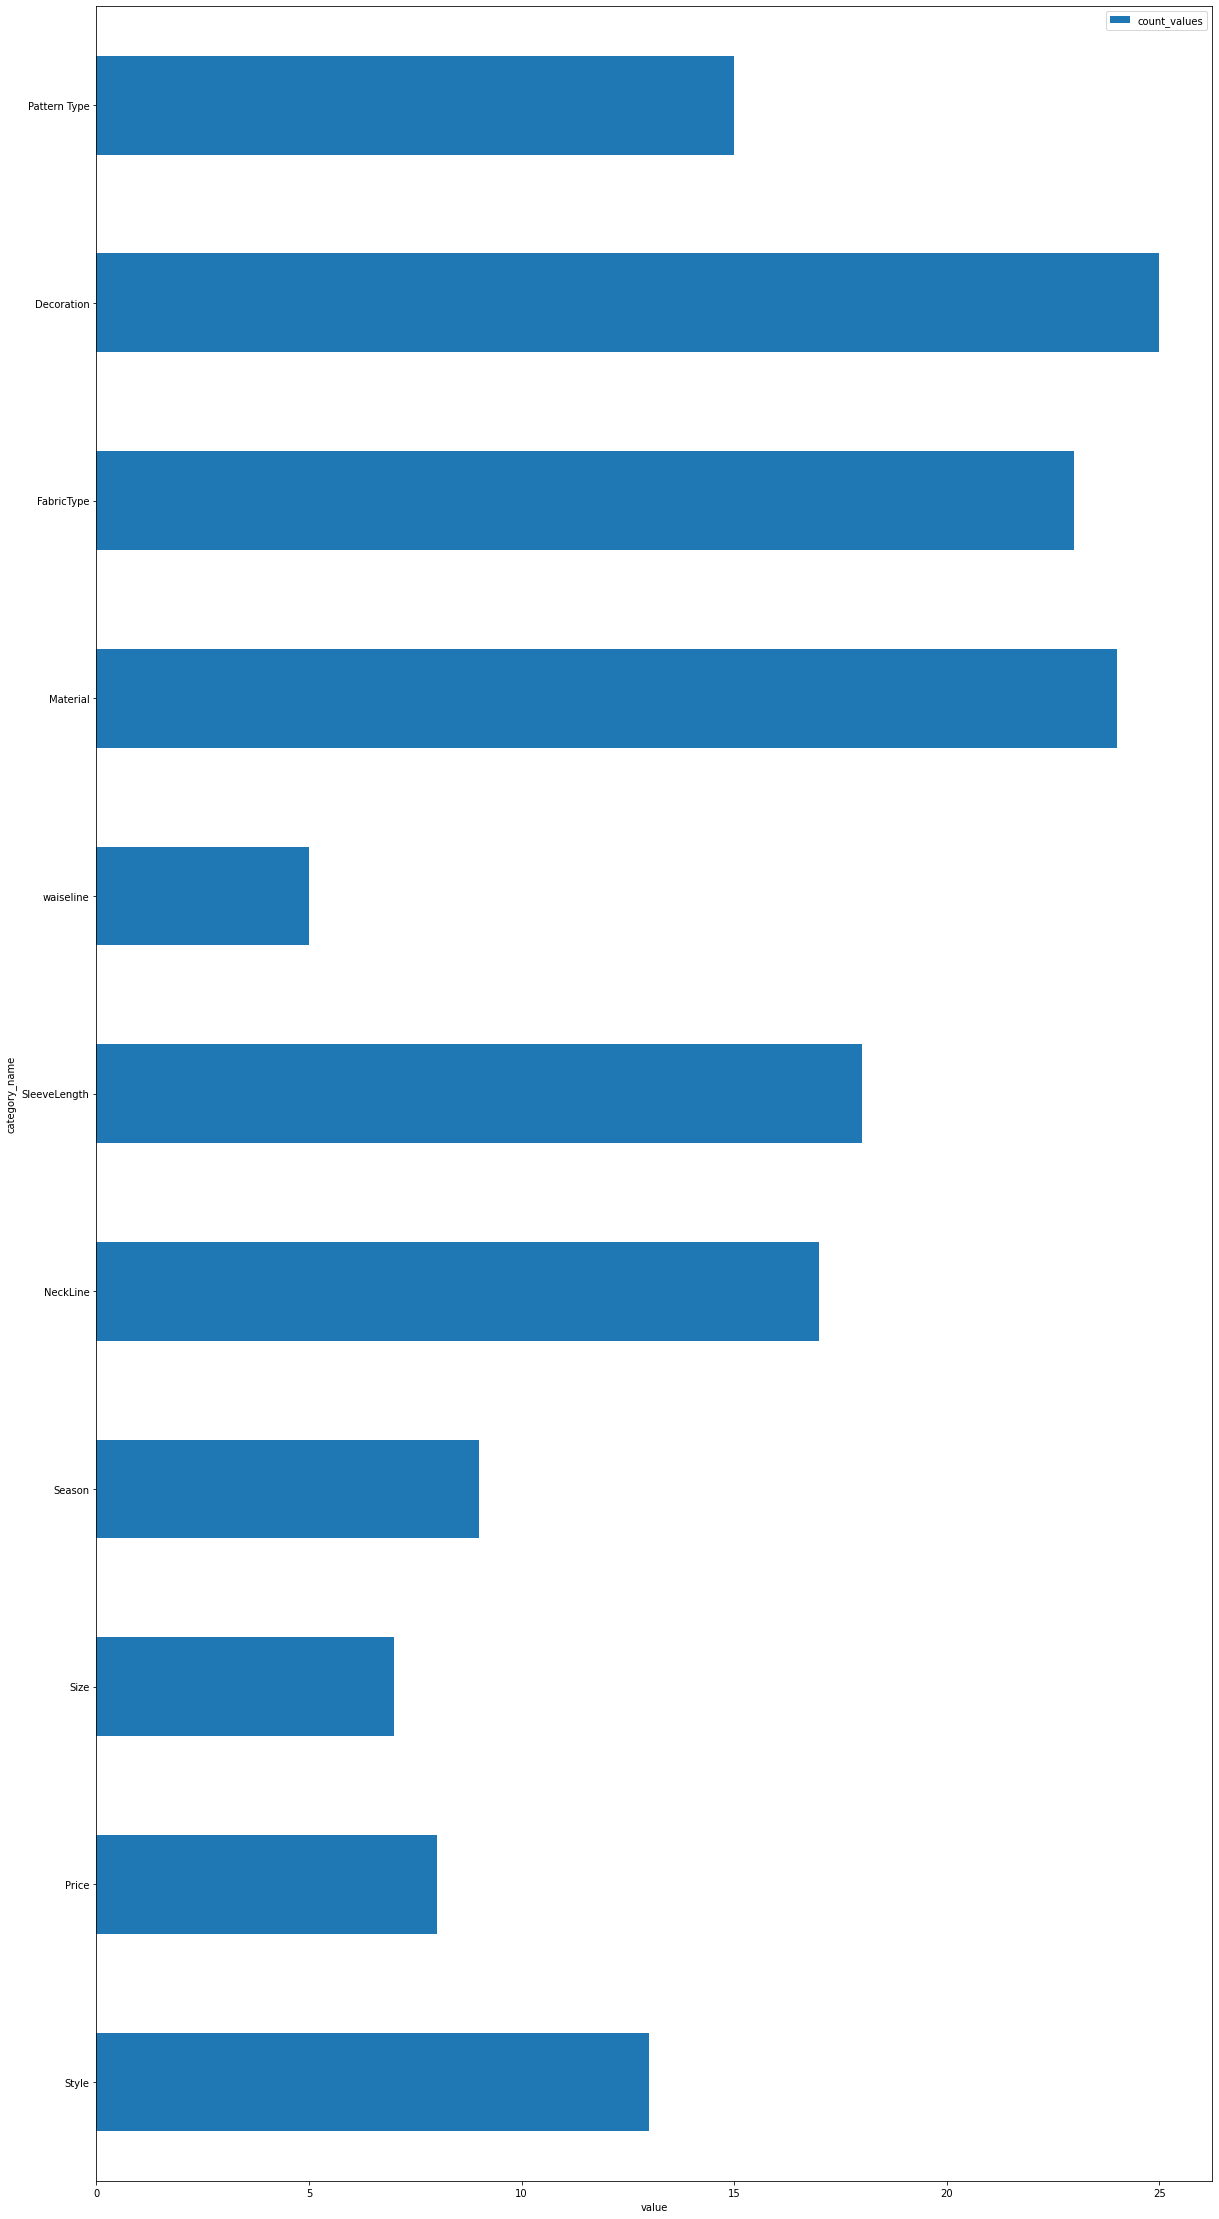

In [ ]:
ax = df.plot.barh(x='category_name', y='count_values',figsize = (20,40))
ax.set_xlabel('value')
ax.set_ylabel('category_name')

In [ ]:
ad["Material"].value_counts()
ad["FabricType"].value_counts()
ad["Decoration"].value_counts()
ad["Size"].value_counts()
ad["Pattern Type"].value_counts()


solid        203
print         71
patchwork     48
animal        21
striped       17
dot           14
geometric      5
plaid          3
leopard        3
floral         2
none           1
character      1
splice         1
leapord        1
Name: Pattern Type, dtype: int64

In [ ]:
"""Storing continuous variable"""
cat = ad.select_dtypes('object')

In [ ]:
cat.head()

,Style,Price,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type
0,Sexy,Low,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal
1,Casual,Low,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal
2,vintage,High,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print
3,Brief,Average,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print
4,cute,Low,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot


In [ ]:
cat['recommendation'] = ad['Recommendation']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
cat.head()

,Style,Price,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,recommendation
0,Sexy,Low,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,Casual,Low,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,vintage,High,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,Brief,Average,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,cute,Low,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


Text(0.5, 1.0, 'countplot for Style')

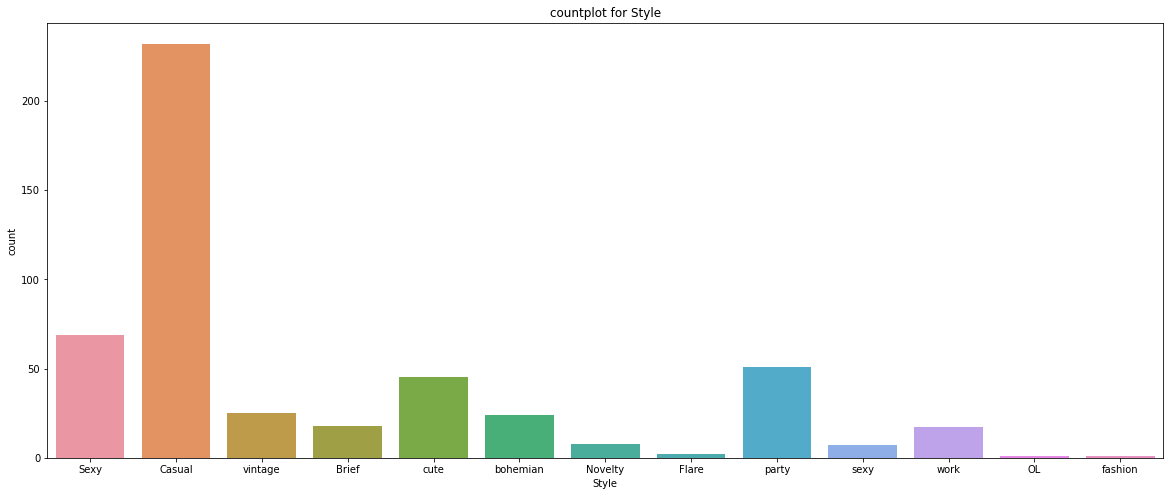

In [ ]:
"""Plotting countplot for categorical"""
plt.figure(figsize=(20, 8))
sns.countplot(data = cat,x = 'Style' )
plt.title('countplot for Style')

Text(0.5, 1.0, 'countplot for Price')

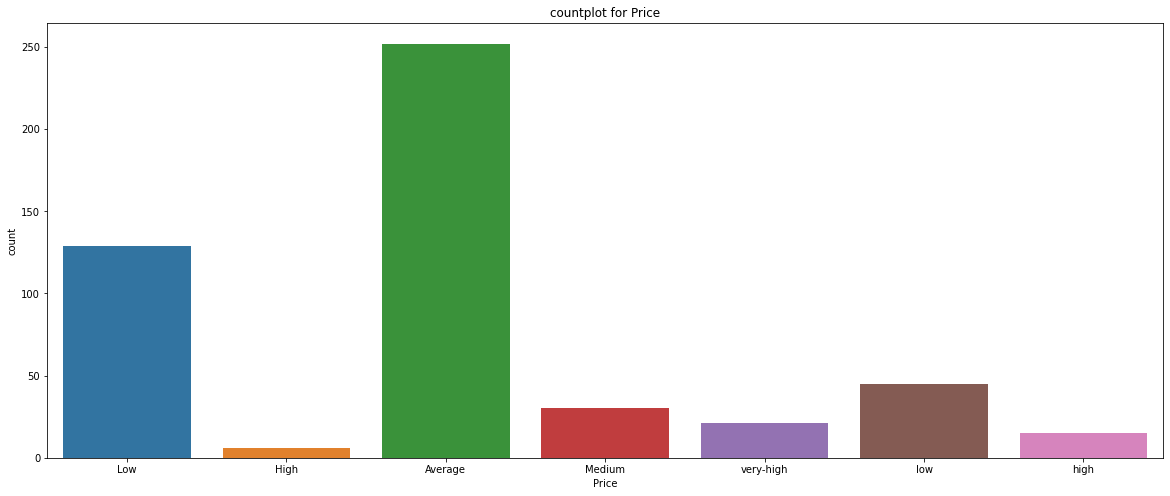

In [ ]:
"""Plotting countplot for categorical"""
plt.figure(figsize=(20, 8))
sns.countplot(data = cat,x = 'Price' )
plt.title('countplot for Price')

Text(0.5, 1.0, 'countplot for Season')

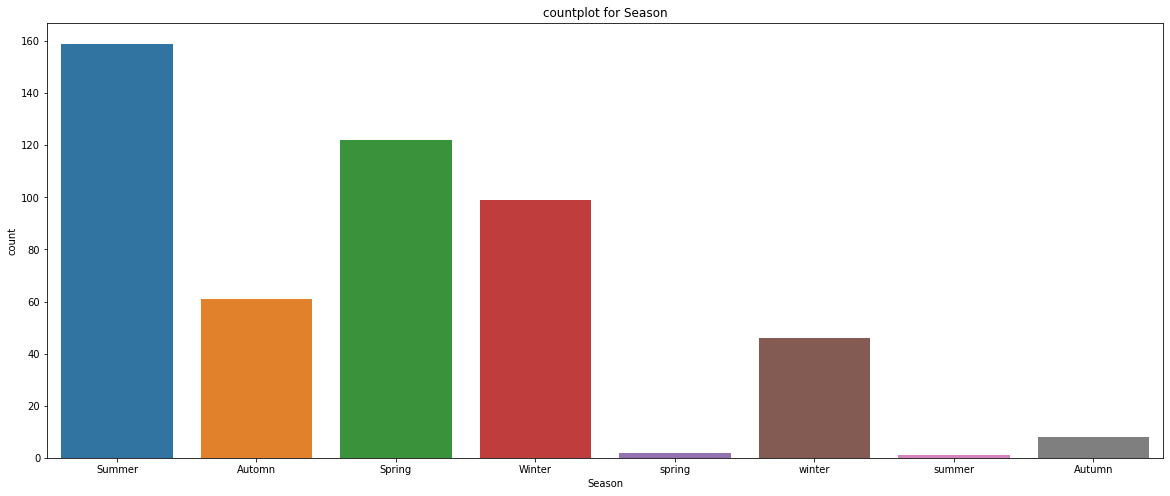

In [ ]:
"""Plotting countplot for categorical"""
plt.figure(figsize=(20, 8))
sns.countplot(data = cat,x = 'Season' )
plt.title('countplot for Season')

Text(0.5, 1.0, 'countplot for NeckLine')

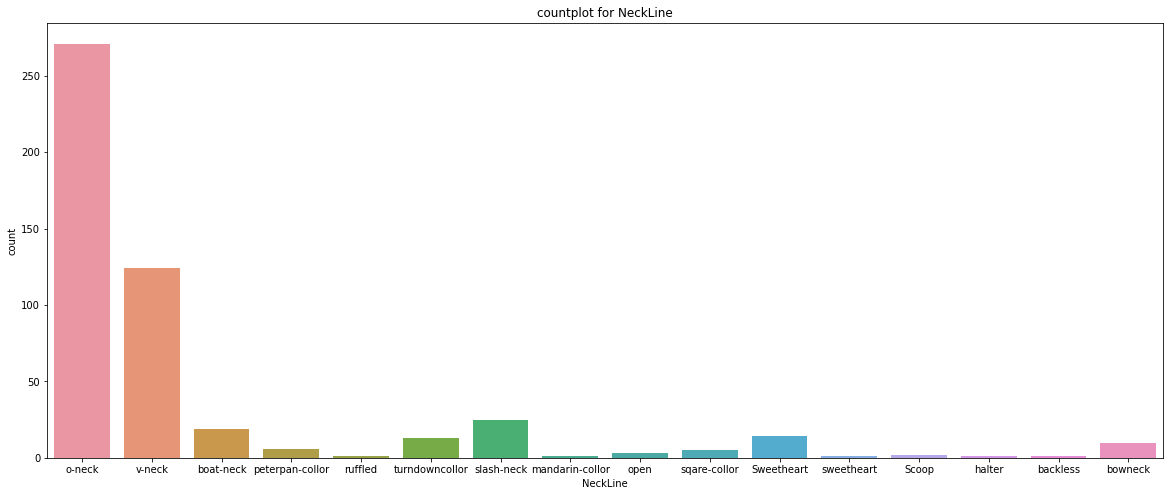

In [ ]:
"""Plotting countplot for categorical"""
plt.figure(figsize=(20, 8))
sns.countplot(data = cat,x = 'NeckLine' )
plt.title('countplot for NeckLine')

Text(0.5, 1.0, 'countplot for SleeveLength')

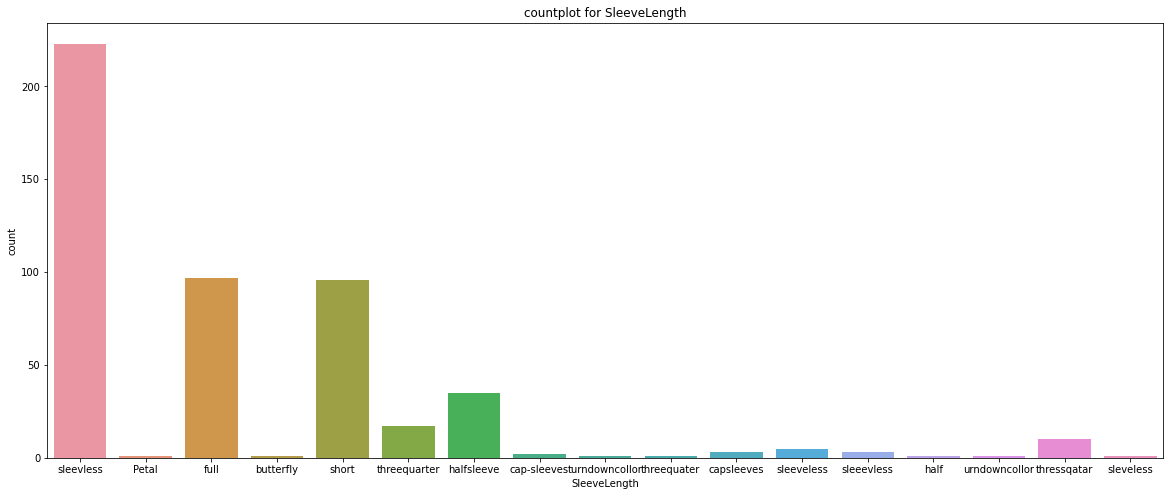

In [ ]:
"""Plotting countplot for categorical"""
plt.figure(figsize=(20, 8))
sns.countplot(data = cat,x = 'SleeveLength' )
plt.title('countplot for SleeveLength')

Text(0.5, 1.0, 'countplot for waiseline')

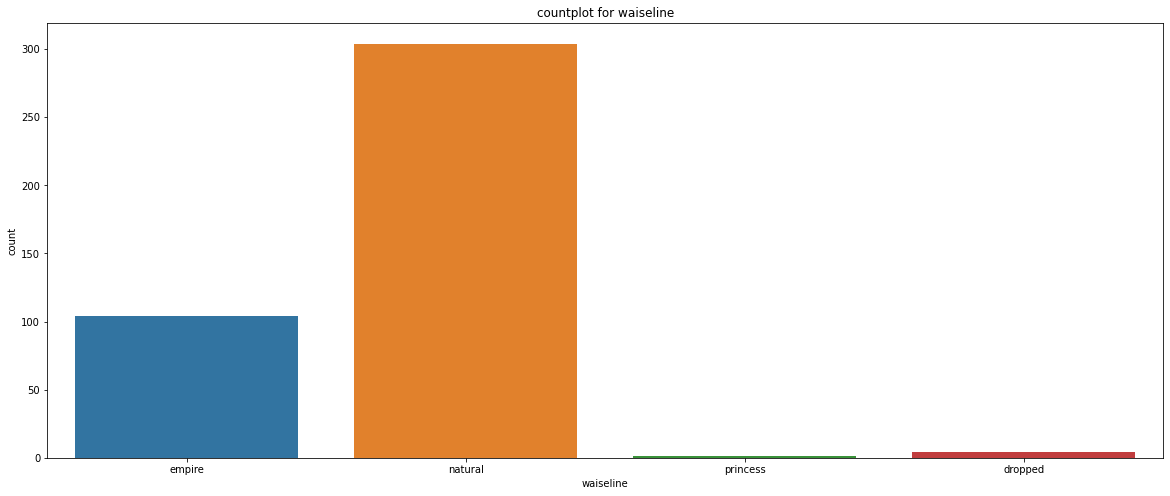

In [ ]:
"""Plotting countplot for categorical"""
plt.figure(figsize=(20, 8))
sns.countplot(data = cat,x = 'waiseline' )
plt.title('countplot for waiseline')

Text(0.5, 1.0, 'countplot for Material')

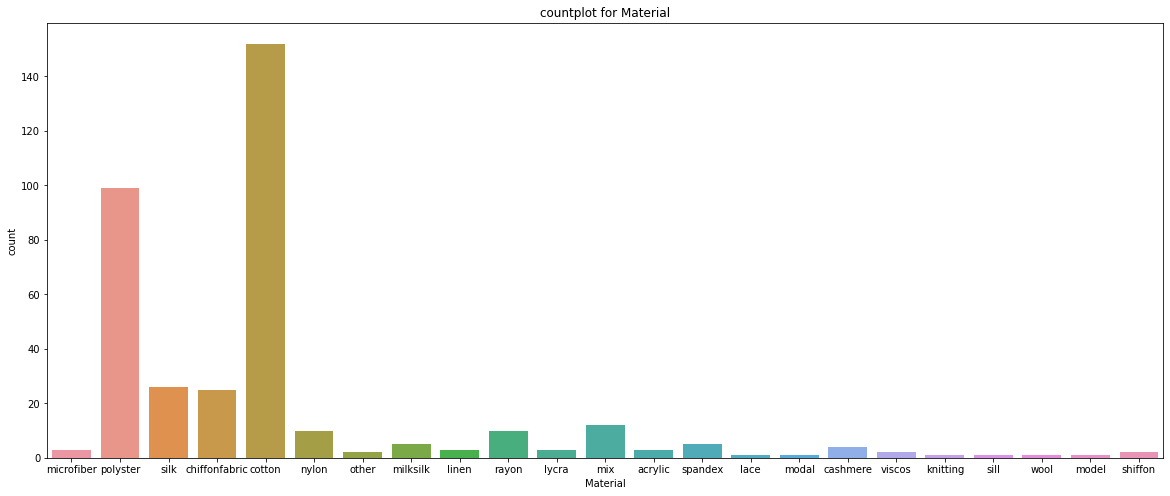

In [ ]:
"""Plotting countplot for categorical"""
plt.figure(figsize=(20, 8))
sns.countplot(data = cat,x = 'Material' )
plt.title('countplot for Material')

Text(0.5, 1.0, 'countplot for FabricType')

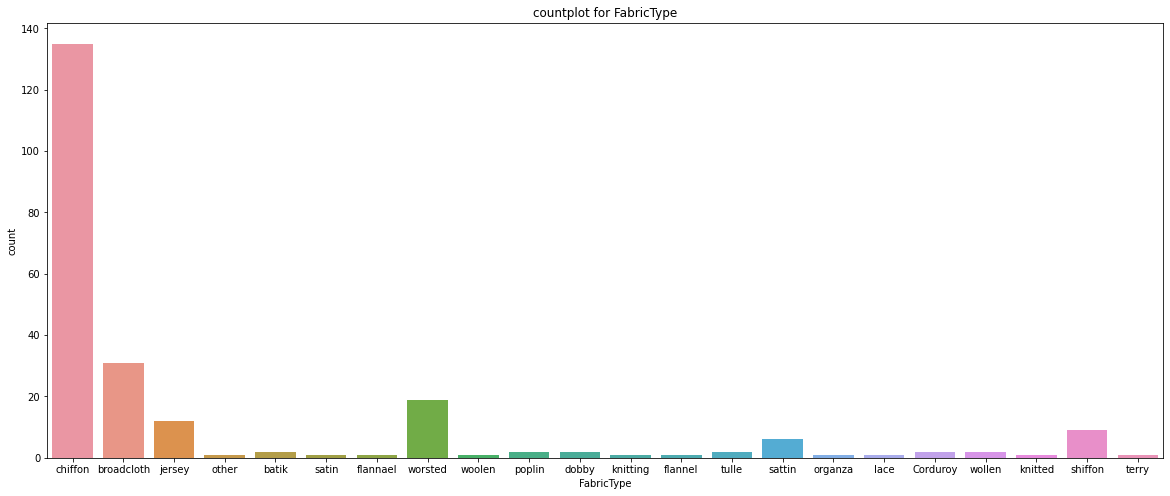

In [ ]:
"""Plotting countplot for categorical"""
plt.figure(figsize=(20, 8))
sns.countplot(data = cat,x = 'FabricType' )
plt.title('countplot for FabricType')

Text(0.5, 1.0, 'countplot for Decoration')

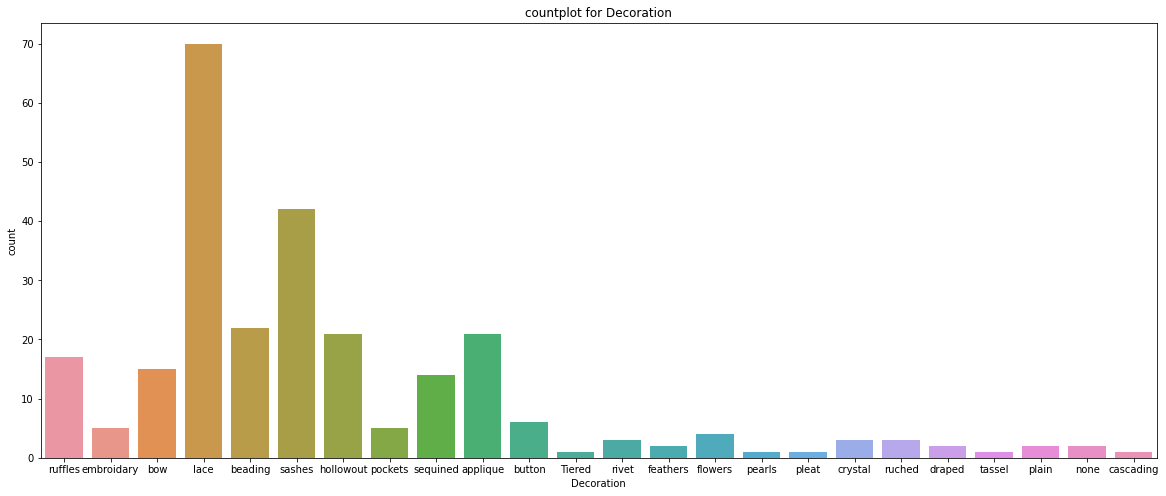

In [ ]:
"""Plotting countplot for categorical"""
plt.figure(figsize=(20, 8))
sns.countplot(data = cat,x = 'Decoration' )
plt.title('countplot for Decoration')

Text(0.5, 1.0, 'countplot for Pattern Type')

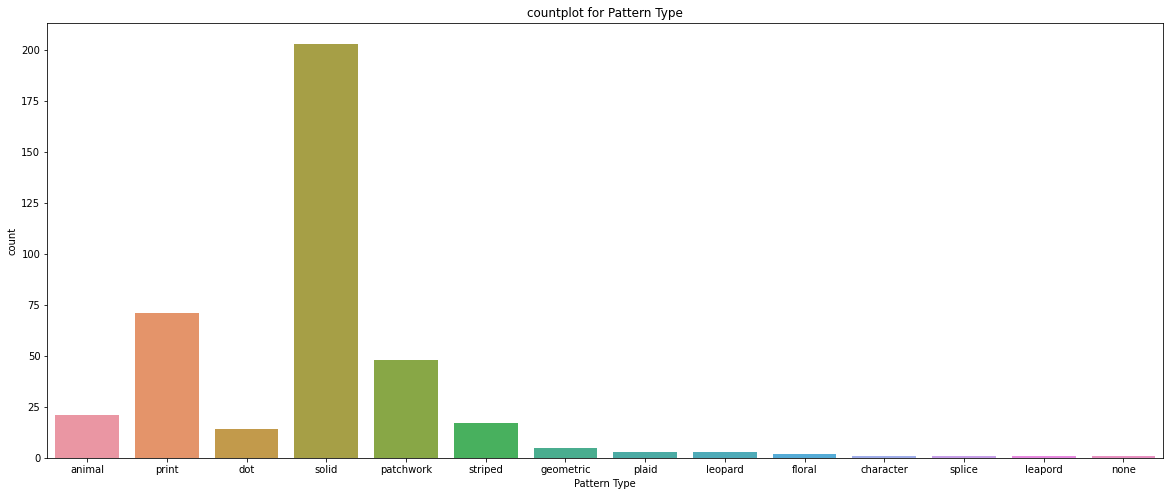

In [ ]:
"""Plotting countplot for categorical"""
plt.figure(figsize=(20, 8))
sns.countplot(data = cat,x = 'Pattern Type' )
plt.title('countplot for Pattern Type')

In [ ]:
ad.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


####Removing redundancy in data

In [ ]:
ad["Style"].value_counts()
ad["Price"].value_counts()
ad["Size"].value_counts()
ad["Season"].value_counts()
ad["NeckLine"].value_counts()
ad["Material"].value_counts()
ad["Pattern Type"].value_counts()

solid        203
print         71
patchwork     48
animal        21
striped       17
dot           14
geometric      5
plaid          3
leopard        3
floral         2
character      1
splice         1
none           1
leapord        1
Name: Pattern Type, dtype: int64

In [ ]:
ad = ad.replace('sexy', 'Sexy', regex=True) # All data frame
ad = ad.replace('low', 'Low', regex=True) # All data frame
ad = ad.replace('high', 'High', regex=True) # All data frame
ad = ad.replace('s', 'S', regex=True) # All data frame
ad = ad.replace('small', 'S', regex=True) # All data frame
ad = ad.replace('Small', 'S', regex=True) # All data frame
ad = ad.replace('Automn', 'Autumn', regex=True) # All data frame
ad = ad.replace('modal', 'model', regex=True) # All data frame
ad = ad.replace('leapord', 'leopard', regex=True) # All data frame
ad = ad.replace('sleevless', 'sleeveless', regex=True)
ad = ad.replace('sleeevless', 'sleeveless', regex=True)
ad = ad.replace('sleveless', 'sleeveless', regex=True)
ad = ad.replace( 'threequater' ,  'threequarter', regex=True)
ad = ad.replace('threequater', 'threequarter', regex=True)
ad = ad.replace('thressqatar', 'threequarter', regex=True)
ad = ad.replace('urndowncollor', 'turndowncollor', regex=True)
ad = ad.replace('capsleeves', 'cap-sleeves', regex=True)
ad = ad.replace('half', 'halfsleeve', regex=True)
ad = ad.replace( 'halfsleevesleeve' ,  'halfsleeve', regex=True)
ad = ad.replace('halfsleevesleeve', 'halfsleeve', regex=True)
ad = ad.replace('tturndowncollor', 'turndowncollor', regex=True)
ad = ad.replace( 'sattin' ,  'satin' , regex=True)
ad = ad.replace('sattin', 'satin', regex=True)
ad = ad.replace('wollen', 'woolen', regex=True)
ad = ad.replace('knitting', 'knitted', regex=True)
ad = ad.replace('shiffon', 'chiffon', regex=True)

####Filling NUll values with most common occuring values

In [ ]:
ad = ad.fillna({"waiseline": "natural"})
ad = ad.fillna({"Material": "cotton"})
ad = ad.fillna({"FabricType": "chiffon"})
ad = ad.fillna({"Decoration": "lace"})
ad = ad.fillna({"Pattern Type": "solid"})
ad = ad.fillna({"Price": "Average"})
ad = ad.fillna({"Season": "Summer"})
ad = ad.fillna({"NeckLine": "o-neck"})
ad = ad.fillna({"SleeveLength": "sleevless"})

In [ ]:
ad = ad.fillna({"Season": "Summer"})

In [ ]:
"""Label encoding"""
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object\
le = LabelEncoder()

In [ ]:
# Get  columns whose data type is object i.e. string
filteredColumns = ad.dtypes[ad.dtypes == np.object]
# list of columns whose data type is object i.e. string
listOfColumnNames = list(filteredColumns.index)
print(listOfColumnNames)

['Style', 'Price', 'Size', 'Season', 'NeckLine', 'SleeveLength', 'waiseline', 'Material', 'FabricType', 'Decoration', 'Pattern Type']


In [ ]:
label_encoders = {}
for column in listOfColumnNames:
  label_encoders[column] = le
  ad[column] = label_encoders[column].fit_transform(ad[column]) 

In [ ]:
ad.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,5,2,4.6,1,2,9,4,1,7,6,22,3,1
1,1212192089,1,2,0.0,0,2,9,0,2,12,6,22,3,0
2,1190380701,10,1,0.0,0,0,9,9,2,18,6,14,12,0
3,966005983,0,0,4.6,0,1,9,9,2,1,6,10,12,1
4,876339541,7,2,4.5,1,2,9,6,2,6,6,5,5,0


In [ ]:
ad.drop(columns=['Dress_ID'],axis = 1, inplace = True)

In [ ]:
y = ad['Recommendation']

In [ ]:
ad.drop(columns=['Recommendation'],axis = 1, inplace = True)

In [ ]:
X = ad

In [ ]:
X.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type
0,5,2,4.6,1,2,9,4,1,7,6,22,3
1,1,2,0.0,0,2,9,0,2,12,6,22,3
2,10,1,0.0,0,0,9,9,2,18,6,14,12
3,0,0,4.6,0,1,9,9,2,1,6,10,12
4,7,2,4.5,1,2,9,6,2,6,6,5,5


In [ ]:
y

0      1
1      0
2      0
3      1
4      0
      ..
495    1
496    0
497    1
498    1
499    0
Name: Recommendation, Length: 500, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Decision Tree classifier

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
param_dict = {
    "criterion":["ginni","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
decision_tree = DecisionTreeClassifier()

In [ ]:
grid = GridSearchCV(decision_tree,param_grid = param_dict,cv = 10,verbose = 1,n_jobs = -1)

In [ ]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 5322 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:   19.2s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                   

In [ ]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 7}

In [ ]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3 ,min_samples_leaf = 1,min_samples_split = 7 )
decision_tree.fit(X_train,y_train)
decision_tree.fit(X_train,y_train)
pred =  decision_tree.predict(X_test)

In [ ]:
pred = decision_tree.predict(X_test)

In [ ]:
decision_tree_score = decision_tree.score(X_test, y_test)
print(decision_tree_score)

0.59


##RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 
forest = RandomForestClassifier(random_state = 1)
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 18.1min finished


In [ ]:
bestF.best_params_

{'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
forest = RandomForestClassifier(n_estimators =300 ,max_depth =15 ,min_samples_split =2 ,min_samples_leaf = 5,random_state = 1)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
pred = forest.predict(X_test)

In [ ]:
forest = forest.score(X_test, y_test)
print(forest)

0.56
